[View in Colaboratory](https://colab.research.google.com/github/KrisSandy/MachineLearning/blob/master/ML_Classification.ipynb)

# Machine Learning - Classification
Author: SandyBoy

## Why scikit-learn

There are many open source Machine learning packages available in the market. TensorFlow, SciKit-learn, Caffe are few to name. For this task I have chosen scikit-learn library which is an open source package developed in python. scikit-learn along with other scientific packages in python (pandas, numpy etc) provides powerful data processing and machine learning tools which can be leveraged with ease.

Besides readily available implementation of K Nearest Neighbors algorithm, below are some of the main reasons for choosing scikit-learn


*   scikit-learn is open source package implemented in python.
*   Its regularly updated with more than 1 release per year which means the packages are up to date.
* Easy to use 
* It has implementations for most of the machine learning tasks such as Clustering, Classification, Regression etc.
* Very good and up to date documentation available.

Beow are some of the features of scikit learn:

*  Powerful functions for data pre processing, transformations and data normalization.
*  Functions to perform many of the Classification, Regression, Clustering algorithms. All the algorithms follow same design principles, so it is easy to adopt and use different machine learning algorithms. 
* Provides powerful functions for Dimensionality reduction 


*Reference: https://www.oreilly.com/ideas/six-reasons-why-i-recommend-scikit-learn*


## Data Pre-processing

Below are the steps followed for getting the data in to the format used by scikit learn:

* Data in the dataset is separated by tab. Each row represents an attribute and columns represent each individual patients. 

* In order to load the data into pandas dataframe, the file is read using read_csv using the separator as tab ('\t'). A transpose of the dataframe is required to bring the data into traditional format i.e. features in columns and observations (patients) in rows. 

* After getting the data in desired format, column names are added to give more sense and completeness to the dataframe.

* Data and Response used to train and test the models should be in numbers as numpy arrays. So Autoimmune_Disease column needs to be converted to 0 and 1 representing negative and positive respectively. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy
fields = ['Age', 'Blood_Pressure', 'BMI', 'Plasma_level', 'Autoimmune_Disease', 
          'Adverse_events', 'Drug_in_serum', 'Liver_function', 'Activity_test',
          'Secondary_test']
autoimmune_data = pd.read_csv(r'/content/gdrive/My Drive/GYE06/CT475_ML/autoimmune.txt',
                 sep='\t',
                 header=None
                )
autoimmune_data = autoimmune_data.transpose()
autoimmune_data.columns = fields
autoimmune_data['Autoimmune_Disease'] = autoimmune_data['Autoimmune_Disease'] \
.map({'negative':0, 'positive':1})

## kNN (k-Nearest Neighbours)

k Nearest Neighbors algorithm is an instance based learning algorithm used for classification. This algorithm predicts the outcome by calculating the distance from the query point to all the data points.  It then takes the k nearest data points and classifies the query point as the category with higest number in the k data points. Distance can be measured either as Euclidean, or Cosign, or Manhattan or Hamming distance. 

Scikit-learn's KNeighborsClassifier has been used for implementing k Nearest Neighbors algorithm. The default distance measurement for kNN algorithm in scikitlearn is 'minkowski'. This can be changed to euclidean distance by using metrics parameter.


#### Normalizing data

When the attributes in the data have wide range of values, attributes with large number range will have more impact during the distance calculation than attributes with smaller number range. Hence data must be normalized. We will be using z normalization, which means data will be scaled in such a way that mean of an attribute is zero and standard deviation is 1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = autoimmune_data.drop(columns = ['Autoimmune_Disease'])
y = autoimmune_data['Autoimmune_Disease']
X_scaled = preprocessing.scale(X)
X_scaled.mean(axis=0) # axis=0 indicated that mean should be taken wrt col
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
print(X_train.shape)
print(X_test.shape)

(282, 9)
(94, 9)


#### Implementing kNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

autoimmune_knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
autoimmune_knn.fit(X_train, y_train)
accuracy_knn = autoimmune_knn.score(X_test, y_test)
print("The accuracy of the model using k=5 is {}".format(accuracy_knn))

The accuracy of the model using k=5 is 0.7659574468085106


## Logistic Regression

Logistic regression is a machine learning technique used for classification problems. In this technique the probability of the response is calculated for the give predictors using sigmoid function:

`sigmoid(t) = (1/1+e^-t)`

This range of the sigmoid function is between 0 and 1. 

In this example, after training a logistic regression model with the data, for new example if the output of the sigmoid function is > 0.5, then we can say its a case of autoimmune disease, and if the result if < 0.5, then its otherwise.


In [5]:
from sklearn.linear_model import LogisticRegression
autoimmune_log_reg = LogisticRegression()
autoimmune_log_reg.fit(X_train, y_train)
accuracy_log_reg = autoimmune_log_reg.score(X_test, y_test)
print("Accuracy using Logistic Regression is {}".format(accuracy_log_reg))

Accuracy using Logistic Regression is 0.8297872340425532


References: 

Logistic Regression: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc 



## 10-fold cross Validation

k fold cross validation is a technique used to find the accuracy of the model. In this technique the dataset is divided into k folds. The training of the model is done using k-1 folds and 1 fold is used for testing the model. This process is repeated k-1 times and changing the testing fold in each iteration. The accuracy of the model is calculated for each iteration and the mean of all the accuracies are taken to get the model accuracy.


#### 10-fold cross validation for kNN

scikit-learn provides a inbuit function which performs the k fold validatio given k. The code is as below

In [6]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=7), X, y, cv=10)
print("Mean of 10-fold cross validation scores : {}".format(scores.mean()))

Mean of 10-fold cross validation scores : 0.7501461988304092


#### Finding optimal values of k

In the above model, n_neigbors has been set to 5, but this may not give high accuracy. In order to find out the optimum value of k, use GridSearchCv of scikit-learn

GridSearchCV will run the model (kNN in this case) with give range of parameters and gives the resulting accuracy scores.


In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors=range(1, 20))
autoimmune_knn = GridSearchCV(KNeighborsClassifier(n_neighbors=1), param_grid, cv=10)
autoimmune_knn.fit(X_scaled, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

Text(0,0.5,'score')

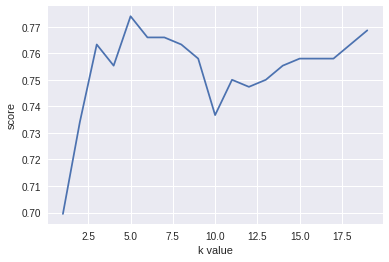

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 20), autoimmune_knn.cv_results_['mean_test_score'])
plt.xlabel('k value')
plt.ylabel('score')

In [9]:
print("Best Score for normalised data : {} for {}".format(autoimmune_knn.best_score_, autoimmune_knn.best_params_))

Best Score for normalised data : 0.773936170212766 for {'n_neighbors': 5}


#### 10-fold cross validation for Logistic Regression

In [10]:
autoimmune_log_reg = LogisticRegression()
accuracy_log_reg = cross_val_score(autoimmune_log_reg, X, y, cv=10).mean()
print("Accuracy using Logistic Regression is {}".format(accuracy_log_reg))

Accuracy using Logistic Regression is 0.7818713450292398


## Conclusion

Both the models gave similar accuracy scores, in fact logistic regression model gave slightly hgher score compared to kNN. Though both the models gave similar accuracies, we have achieved only around 78% accuracy. This may be that we have very less data to train the models and the accuracy may increase by collecting more samples and hence covering even wider and better range of values.

####References 



*   http://scikit-learn.org/stable/index.html (Documentation related to train_test_split, KNeighborsClassifier, LogisticRegression, GridSearchCV, cross_val_score)
*   https://www.dataschool.io/machine-learning-with-scikit-learn/


